# Class Activities for Machine Learning 2

### Musab bin Jamil - 29409
### Hussain Diwan   - 29410

## Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, calinski_harabasz_score, silhouette_samples, pairwise_distances
from sklearn_extra.cluster import KMedoids
from kmodes.kprototypes import  KPrototypes
from kmodes.kmodes import KModes  # For K-Modes
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

## Results

### Silouhette Scores for all Methods
#### K Means      = 0.428
#### K Prototypes = 0.430
#### K Medoids    = 0.717
#### K Modes      = 0.393
#### K Midranges  = 0.739

## Interpretation

### Radar Chart

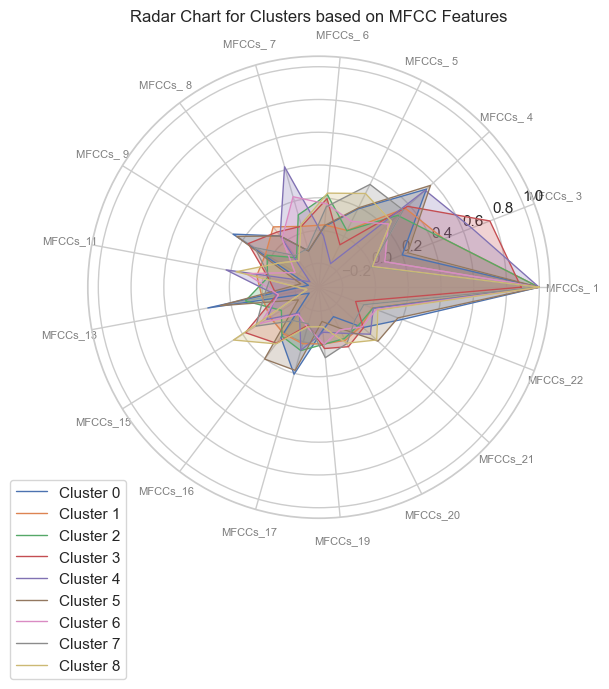

In [37]:
# Filter only MFCC columns (excluding 'Family', 'Genus', 'Species', and 'Cluster')
mfcc_columns = [col for col in new_data.columns if 'MFCCs_' in col]

# Group data by Cluster and compute mean of each MFCC feature for each cluster
cluster_means = new_data.groupby('Cluster')[mfcc_columns].mean()

# Number of variables (MFCC features)
num_vars = len(mfcc_columns)

# Compute angle for each feature
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot needs to be circular, so we complete the loop
angles += angles[:1]

# Create radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plotting each cluster
for cluster_idx in cluster_means.index:
    values = cluster_means.loc[cluster_idx].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {cluster_idx}')
    ax.fill(angles, values, alpha=0.25)

# Add feature names as labels
plt.xticks(angles[:-1], mfcc_columns, color='grey', size=8)

# Add legend and title
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart for Clusters based on MFCC Features')

# Show the plot
plt.show()

### Clustor Centroids

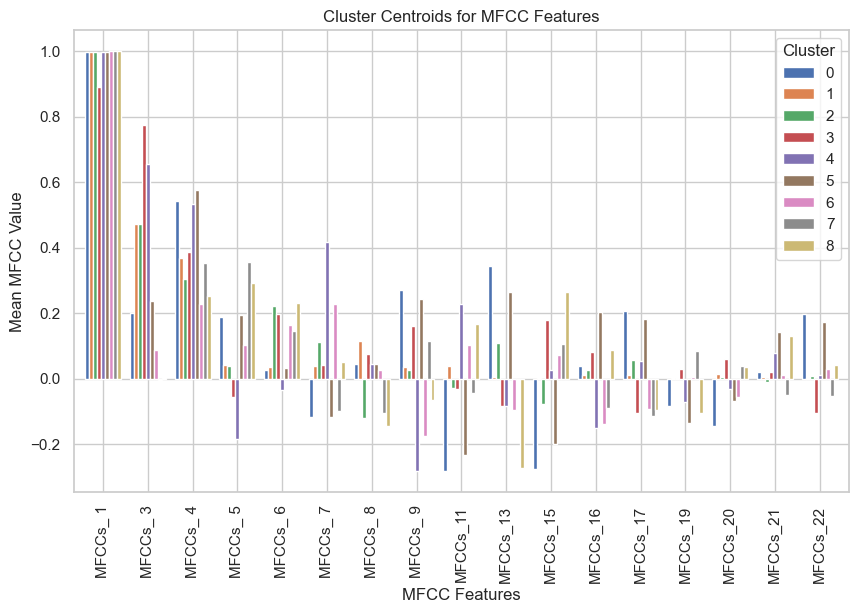

In [38]:
cluster_means.T.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Cluster Centroids for MFCC Features')
plt.ylabel('Mean MFCC Value')
plt.xlabel('MFCC Features')
plt.legend(title='Cluster')
plt.show()

Average silhouette score: 0.222817316921605


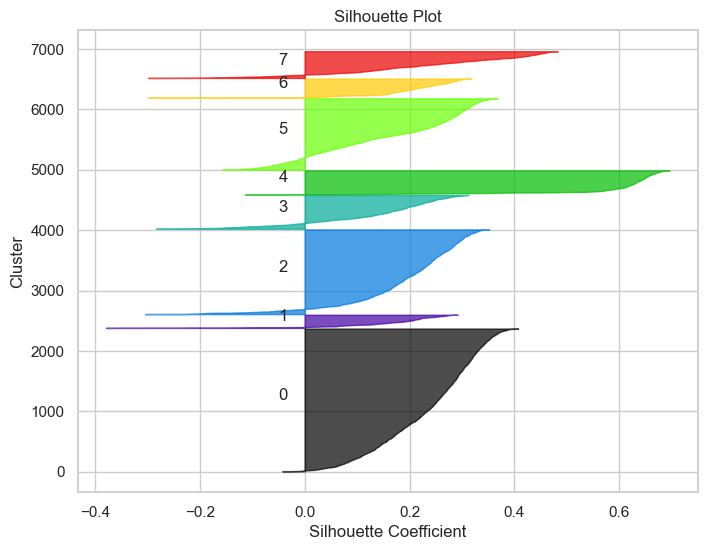

In [40]:
X = new_data[mfcc_columns].values  # Assuming features only

# Silhouette Score
silhouette_avg = silhouette_score(X, new_data['Cluster'])
print(f'Average silhouette score: {silhouette_avg}')

# Silhouette Plot
sample_silhouette_values = silhouette_samples(X, new_data['Cluster'])

fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(8):  # For 8 clusters
    ith_cluster_silhouette_values = sample_silhouette_values[new_data['Cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 8)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for space between plots

ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")

plt.show()

### Heatmap of clusters against features

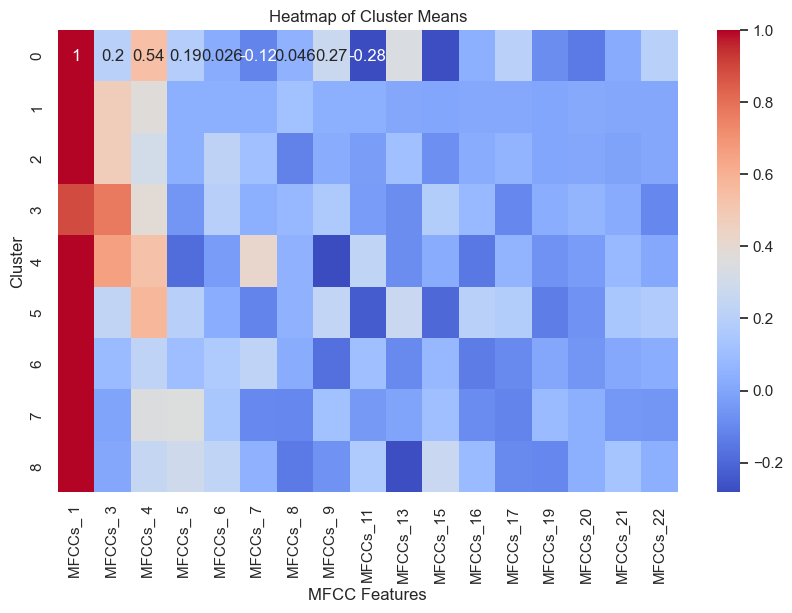

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm')
plt.title('Heatmap of Cluster Means')
plt.ylabel('Cluster')
plt.xlabel('MFCC Features')
plt.show()

### Distribution plots of features against clustors

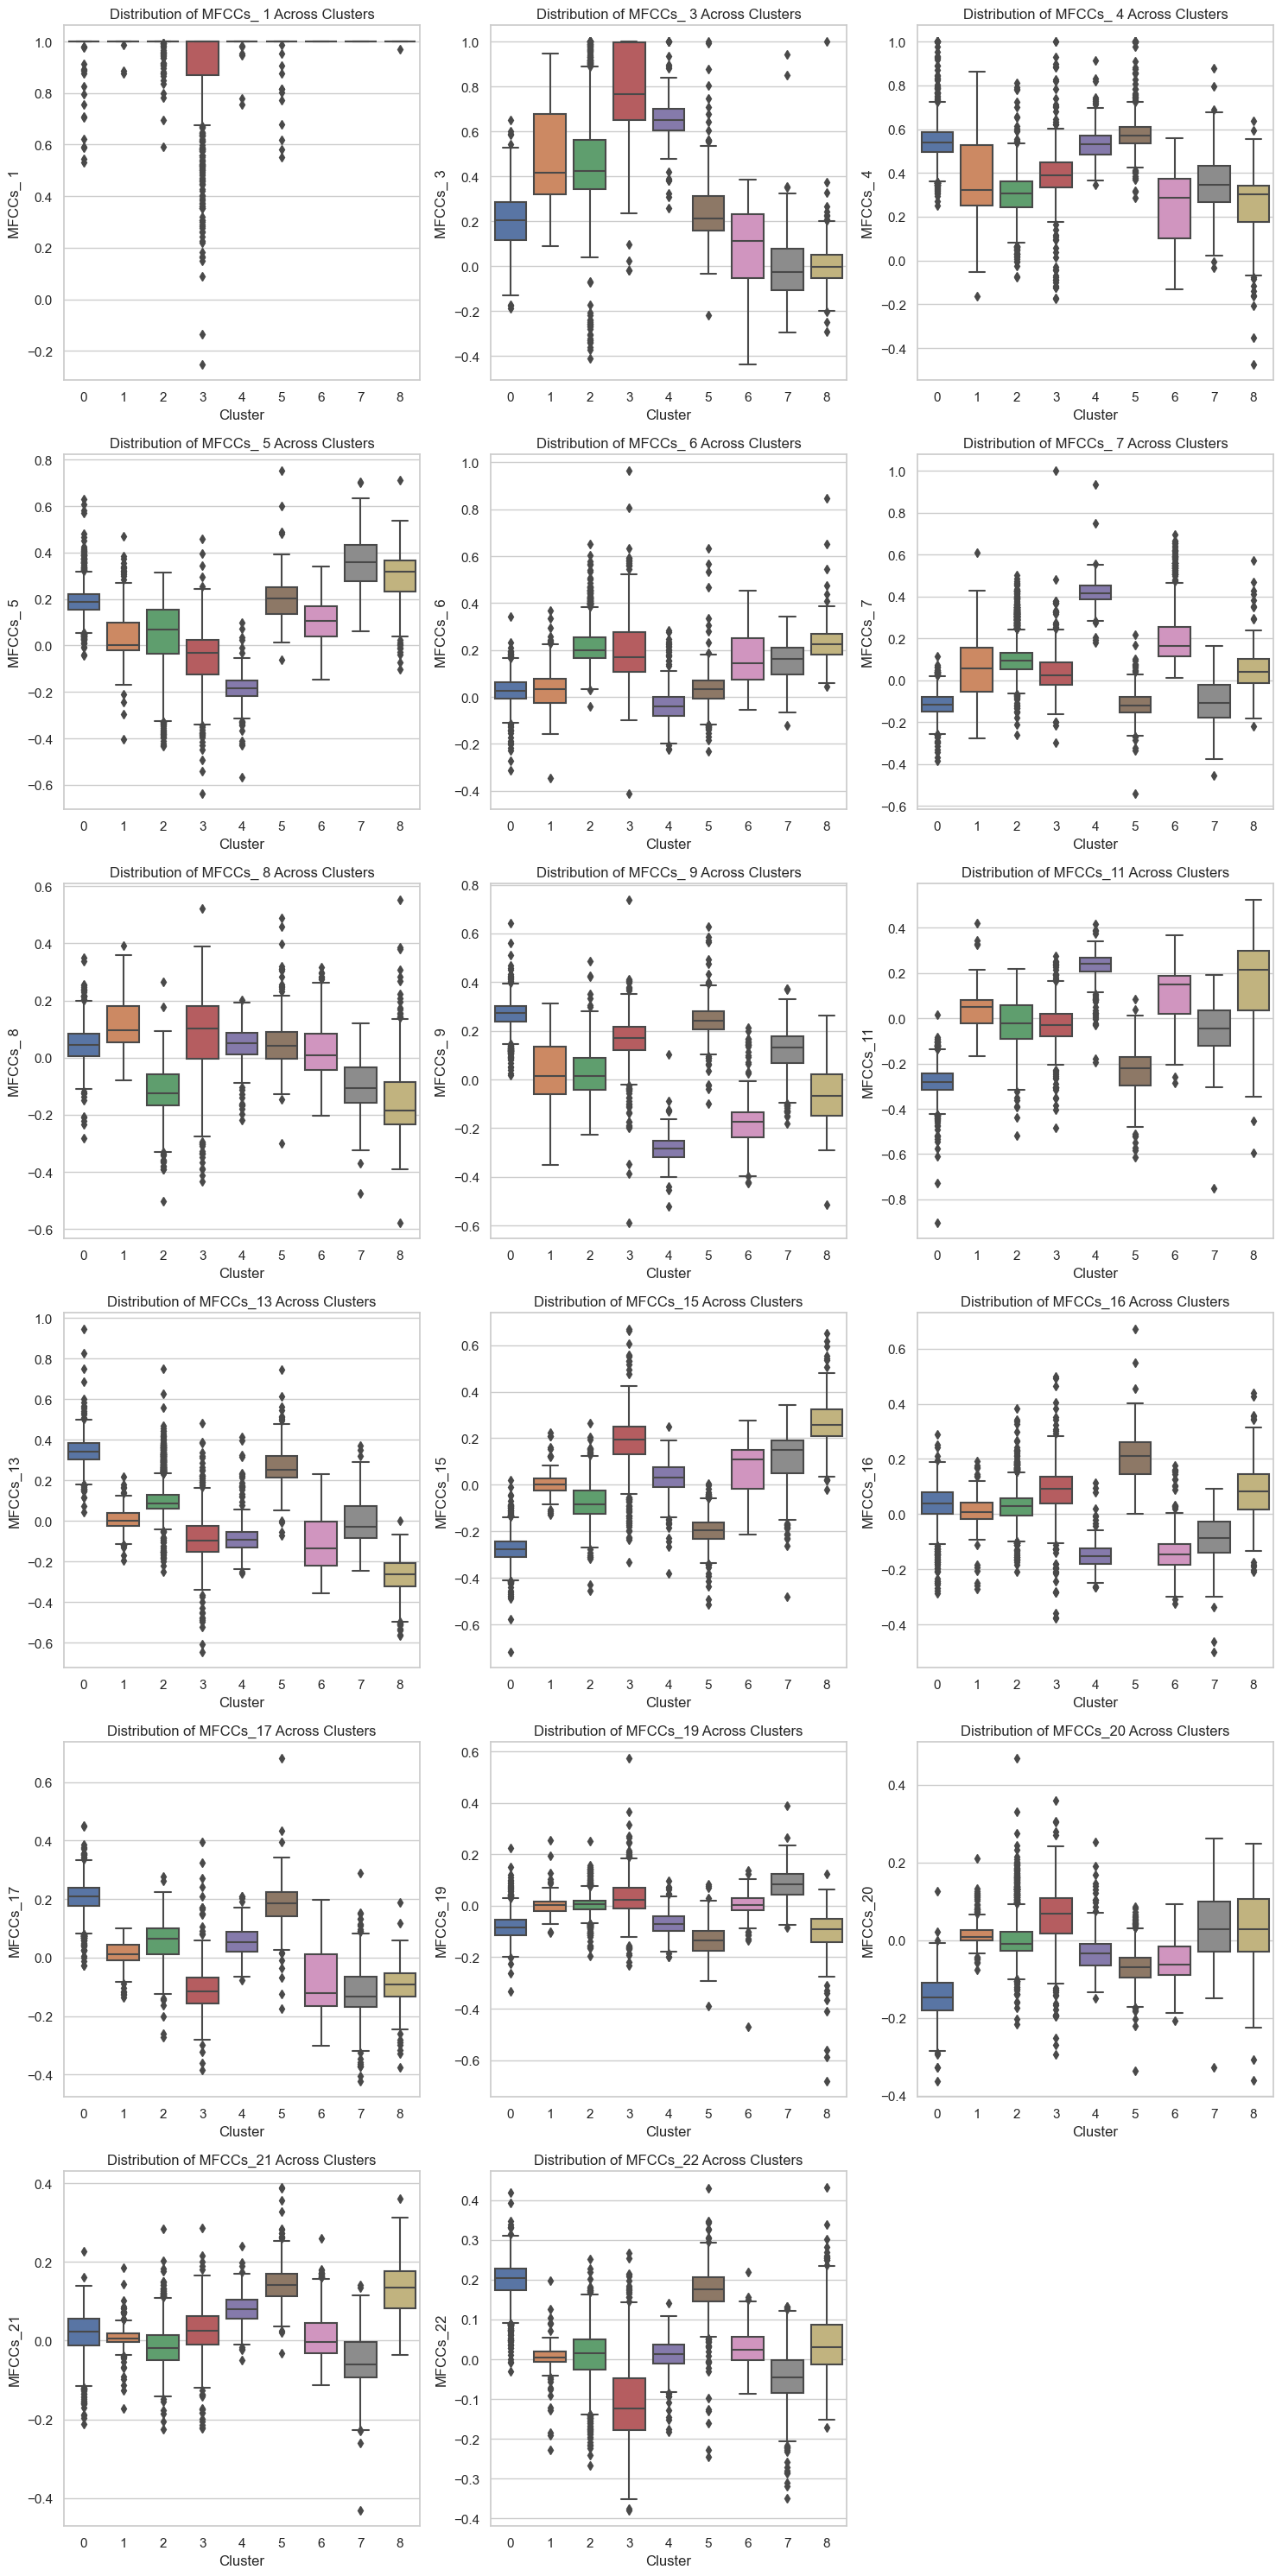

In [44]:
# List of MFCC columns to plot
mfcc_columns = [col for col in new_data.columns if 'MFCCs_' in col]

# Set the number of rows and columns for subplots
num_features = len(mfcc_columns)
num_cols = 3  # You can adjust this number based on your preference
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create box plots for each MFCC column
for idx, mfcc in enumerate(mfcc_columns):
    sns.boxplot(x='Cluster', y=mfcc, data=new_data, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {mfcc} Across Clusters')
    axes[idx].set_xlabel('Cluster')
    axes[idx].set_ylabel(mfcc)

# Remove empty subplots if any
for j in range(idx + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Data

In [4]:
data = pd.read_csv(r'Frogs_MFCCs.csv')

In [5]:
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [6]:
data = data.drop(columns=['RecordID'])

In [7]:
data_cat = pd.read_csv(r'Frogs_MFCCs.csv')

In [8]:
data_cat = data_cat.drop(columns=['RecordID'])

In [9]:
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Family', 'Genus', 'Species']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [10]:
# Check the processed dataset
print(data.head())

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_16  MFCCs_17  MFCCs_18  MFCCs_19  \
0 -0.150063 -0.171128  0.124676  ... -0.024017 -0.108351 -0.077623 -0.009568   
1 -0.222475 -0.207693  0.170883  ...  0.012022 -0.090974 -0.056510 -0.035303   
2 -0.242234 -0.219153  0.232538  ...  0.083536 -0.050691 -0.023590 -0.066722   
3 -0.194347 -0.098181  0.270375  ... -0.050224 -0.136009 -0.177037 -0.130498   
4 -0.265423 -0.172700  0.266434  ...  0.062837 -0.048885 -0.053074 -0.088550   

   MFCCs_20  MFCCs_21  MFCCs_22  Family  Genus  Species  
0  0.05768

## Cleaning and EDA

In [11]:
data.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,2.520083,1.255733,2.401529
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,0.676037,1.734515,2.179178
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,0.000000,0.000000,0.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,2.000000,0.000000,1.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,3.000000,0.000000,1.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,3.000000,3.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,3.000000,7.000000,9.000000


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

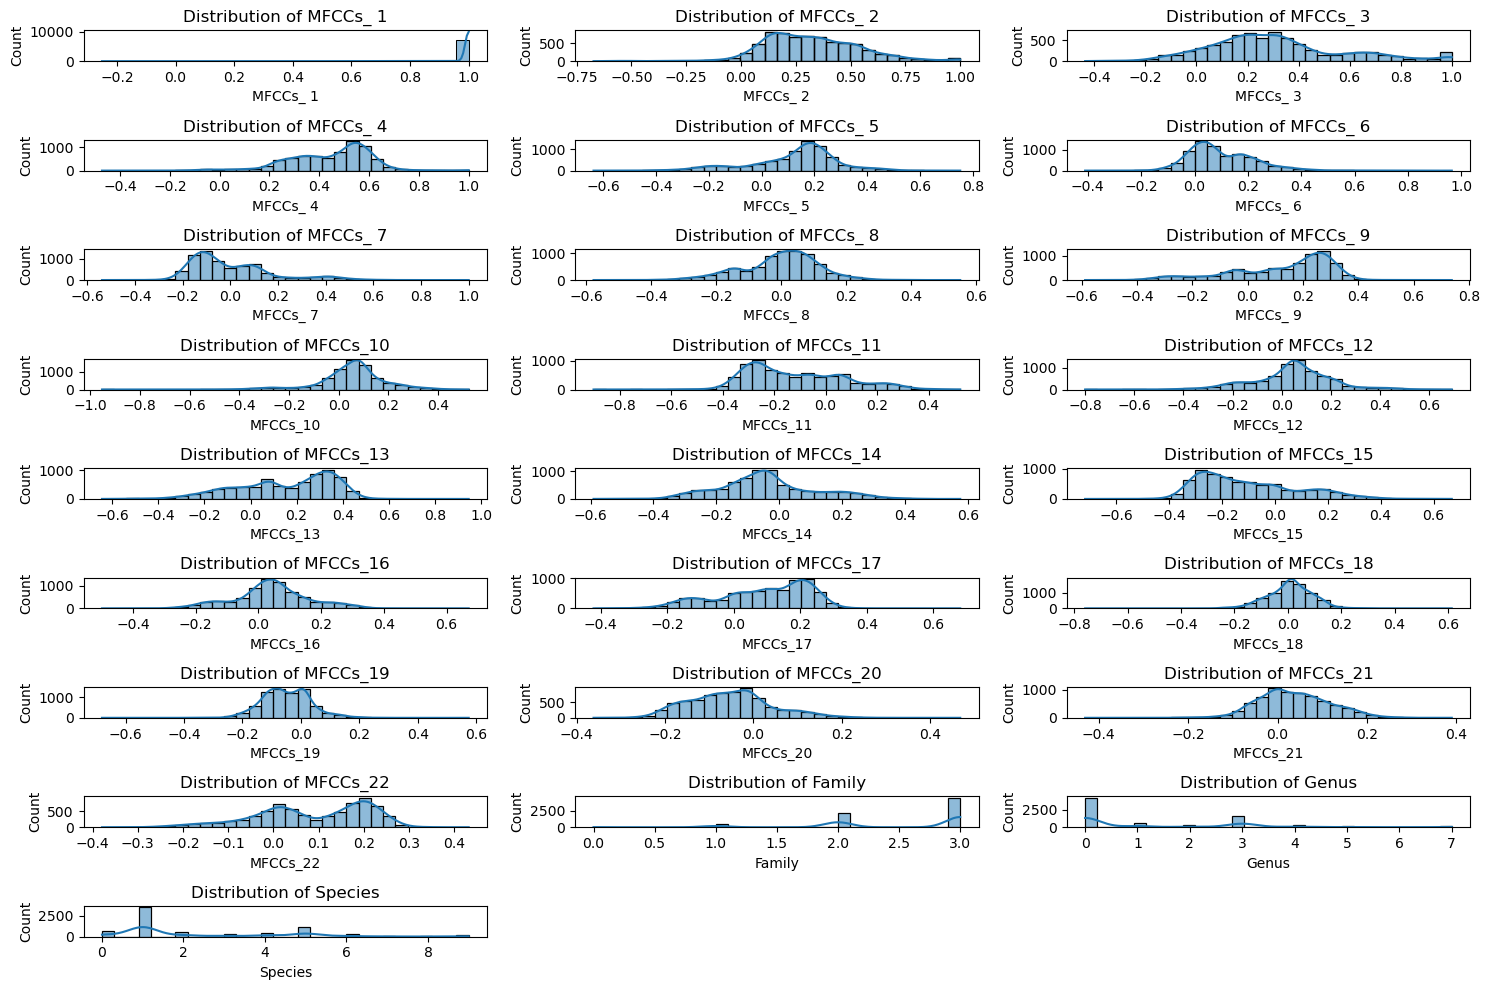

In [12]:
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset
for i, column in enumerate(data.columns):
    # Create a new subplot for each column
    plt.subplot(len(data.columns) // 3 + 1, 3, i + 1)
    sns.histplot(data[column], kde=True, bins=30)
    
    # Add a title to each subplot
    plt.title(f'Distribution of {column}')
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()

# Show the plot
plt.show()

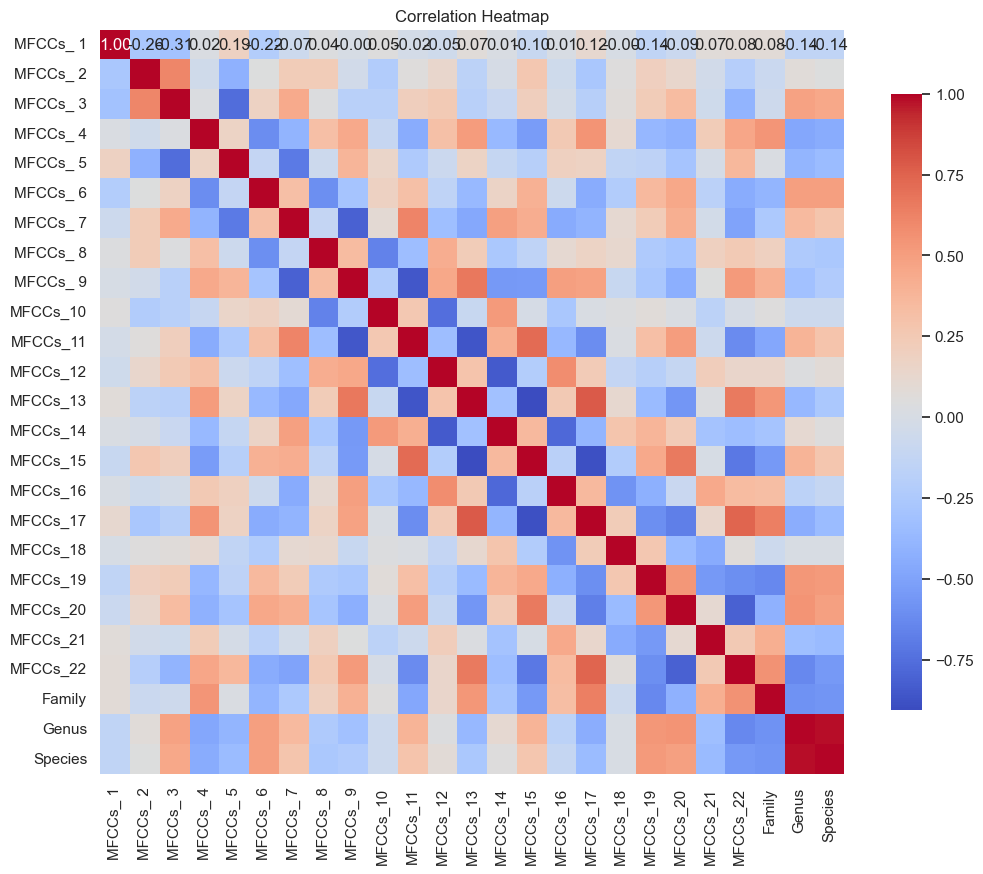

In [13]:
sns.set(style='whitegrid')
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [14]:
new_data = data

In [15]:
new_data.columns

Index(['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6',
       'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12',
       'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18',
       'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22', 'Family', 'Genus',
       'Species'],
      dtype='object')

In [16]:
columns_to_drop = ['MFCCs_18', 'MFCCs_14', 'MFCCs_12', 'MFCCs_10', 'MFCCs_ 2']
new_data = new_data.drop(columns=columns_to_drop)

In [17]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 3  7195 non-null   float64
 2   MFCCs_ 4  7195 non-null   float64
 3   MFCCs_ 5  7195 non-null   float64
 4   MFCCs_ 6  7195 non-null   float64
 5   MFCCs_ 7  7195 non-null   float64
 6   MFCCs_ 8  7195 non-null   float64
 7   MFCCs_ 9  7195 non-null   float64
 8   MFCCs_11  7195 non-null   float64
 9   MFCCs_13  7195 non-null   float64
 10  MFCCs_15  7195 non-null   float64
 11  MFCCs_16  7195 non-null   float64
 12  MFCCs_17  7195 non-null   float64
 13  MFCCs_19  7195 non-null   float64
 14  MFCCs_20  7195 non-null   float64
 15  MFCCs_21  7195 non-null   float64
 16  MFCCs_22  7195 non-null   float64
 17  Family    7195 non-null   int32  
 18  Genus     7195 non-null   int32  
 19  Species   7195 non-null   int32  
dtypes: float64(17), int32(3)
memor

In [18]:
data_cat = data_cat.drop(columns=columns_to_drop)

### Principle components

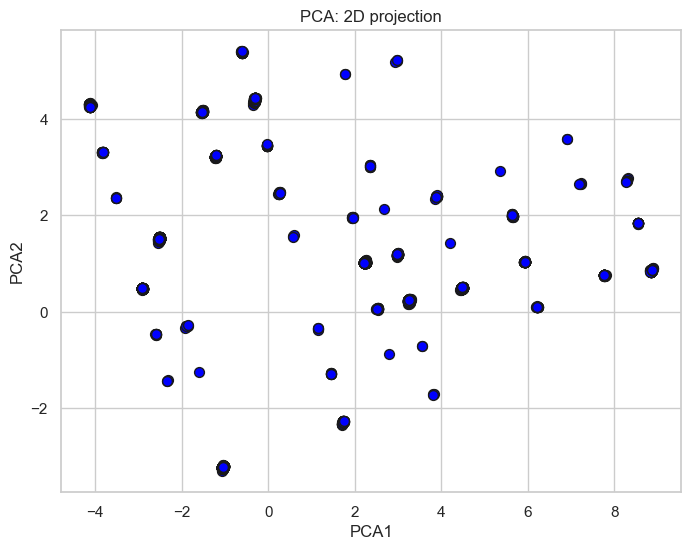

In [46]:
# Performing PCA to reduce the data to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(new_data)

# Converting the PCA results into a new DataFrame
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c='blue', edgecolor='k', s=50)
plt.title('PCA: 2D projection')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()

### t-SNE components

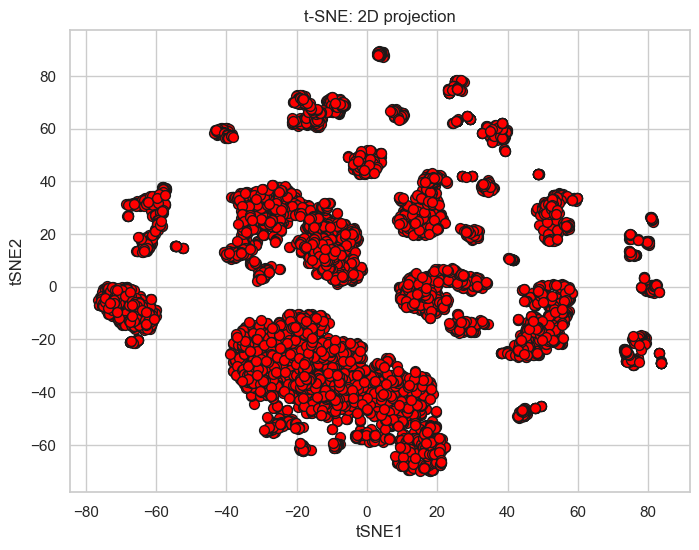

In [47]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(new_data)

# Converting the t-SNE results into a new DataFrame
tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])

# Plotting the t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['tSNE1'], tsne_df['tSNE2'], c='red', edgecolor='k', s=50)
plt.title('t-SNE: 2D projection')
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')
plt.grid(True)
plt.show()

## Clustering

### K Means

C:\Users\lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\lenovo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\lenovo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\lenovo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\lenovo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

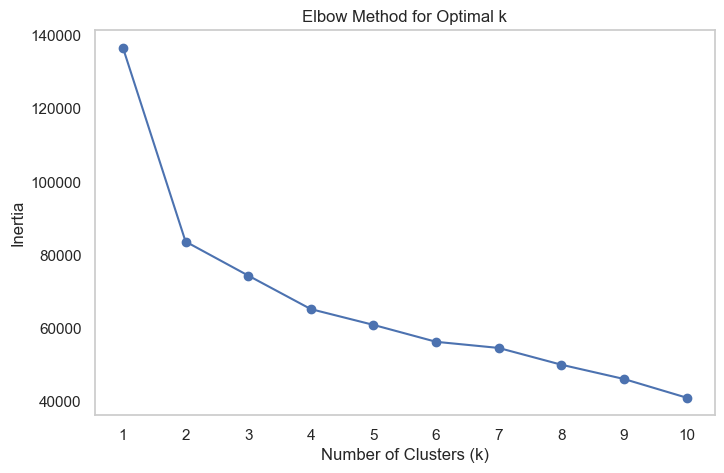

In [19]:
features = new_data.drop(columns=['Species'])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

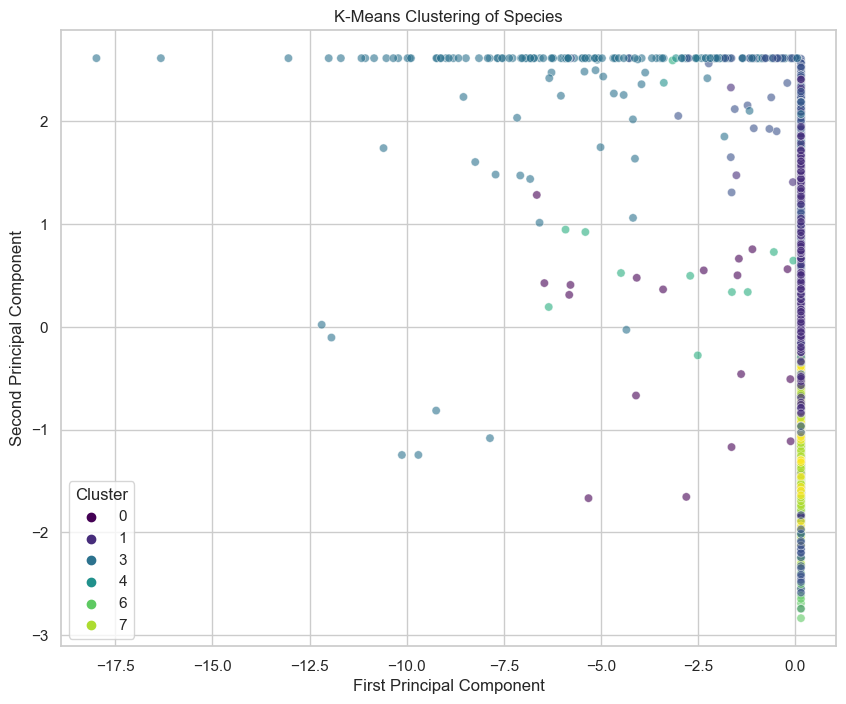

In [20]:
# Choosing the number of clusters (let's say k=3 based on the elbow method)
optimal_k = 9

# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original data
new_data['Cluster'] = clusters

# Calculate clustering metrics
true_labels = new_data['Species']

# Visualizing the clusters (using the first two principal components)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=clusters, palette='viridis', alpha=0.6)
plt.title('K-Means Clustering of Species')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster')
plt.show()

In [21]:
silhouette_avg = silhouette_score(new_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.6545995495047421


### K Prototypes

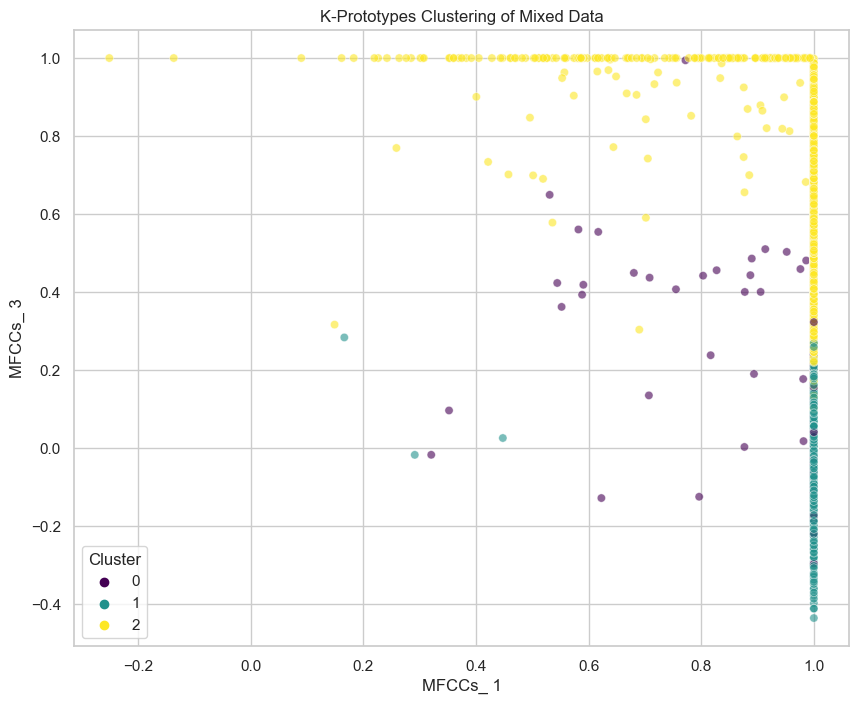

In [22]:
# Define which columns are numerical and which are categorical
numerical_columns = data_cat.columns[:-3]  # All columns except the last three (Family, Genus, Species)
categorical_columns = ['Family', 'Genus', 'Species']  # Define categorical columns

# Convert categorical columns to type 'category'
for column in categorical_columns:
    data[column] = data_cat[column].astype('category')

# Prepare the data for K-Prototypes
# Use the indices of categorical columns for K-Prototypes
categorical_indices = [data_cat.columns.get_loc(col) for col in categorical_columns]

# Fit the K-Prototypes model
n_clusters = 3  # Set the desired number of clusters
kproto = KPrototypes(n_clusters=n_clusters, init='Cao', n_init=10, random_state=42)
clusters = kproto.fit_predict(data_cat, categorical=categorical_indices)

# Add the cluster labels to the original data
data['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_cat[numerical_columns[0]], y=data[numerical_columns[1]], hue=clusters, palette='viridis', alpha=0.6)
plt.title('K-Prototypes Clustering of Mixed Data')
plt.xlabel('First Component)
plt.ylabel('Second Component')
plt.legend(title='Cluster')
plt.show()

In [23]:
numerical_data = data[numerical_columns]

# Calculate the silhouette score
# Note: The silhouette score only applies to numerical data
score = silhouette_score(numerical_data, clusters, metric='euclidean')

print(f'Silhouette Score: {score}')

Silhouette Score: 0.4301678593085424


### K Medoids

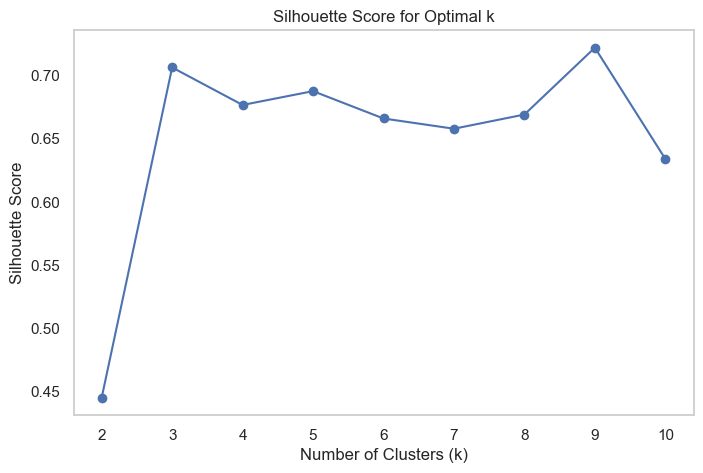

In [24]:
silhouette_scores = []
k_values = range(2, 11)  # Start from 2 because K-Medoids needs at least 2 clusters

for k in k_values:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    clusters = kmedoids.fit_predict(new_data)
    silhouette_scores.append(silhouette_score(new_data, clusters))

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

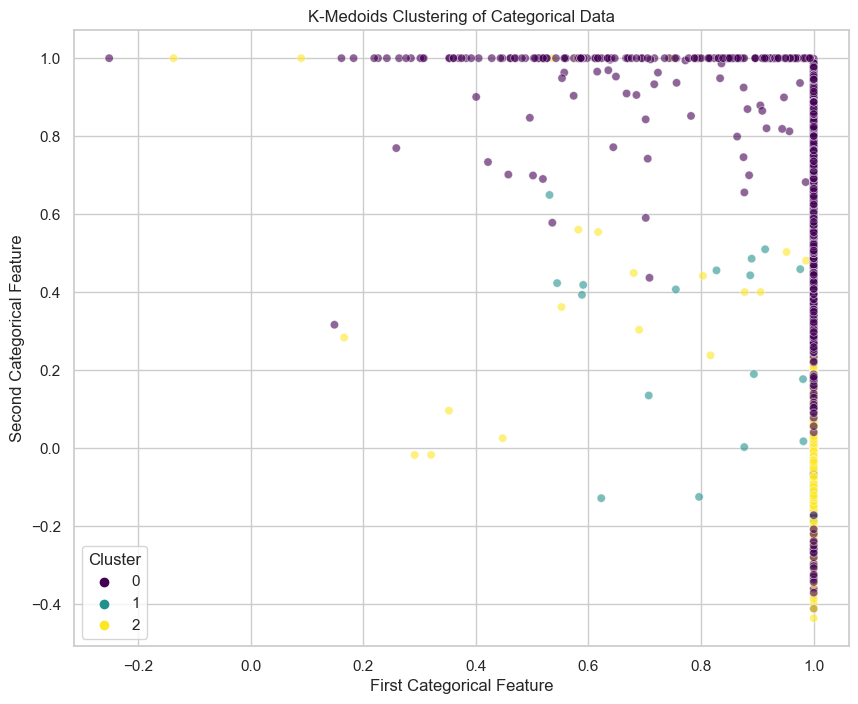

In [25]:
optimal_k = 3

# Fit K-Medoids with the optimal number of clusters
kmedoids = KMedoids(n_clusters=optimal_k, random_state=42)
clusters = kmedoids.fit_predict(new_data)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# Visualizing the clusters (optional, only for small datasets)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=new_data.iloc[:, 0], y=new_data.iloc[:, 1], hue=clusters, palette='viridis', alpha=0.6)
plt.title('K-Medoids Clustering of Categorical Data')
plt.xlabel('First Categorical Feature')
plt.ylabel('Second Categorical Feature')
plt.legend(title='Cluster')
plt.show()

In [26]:
silhouette_scores

[0.44511770155289404,
 0.7063387529207465,
 0.6766584267832835,
 0.687607483762761,
 0.6659639176980607,
 0.6578722598656864,
 0.6690860856858567,
 0.7219874169562024,
 0.6339840727483614]

In [27]:
average_score = sum(silhouette_scores) / len(silhouette_scores)
print("Average Silhouette Score:", average_score)

Average Silhouette Score: 0.6516240131082058


### K modes

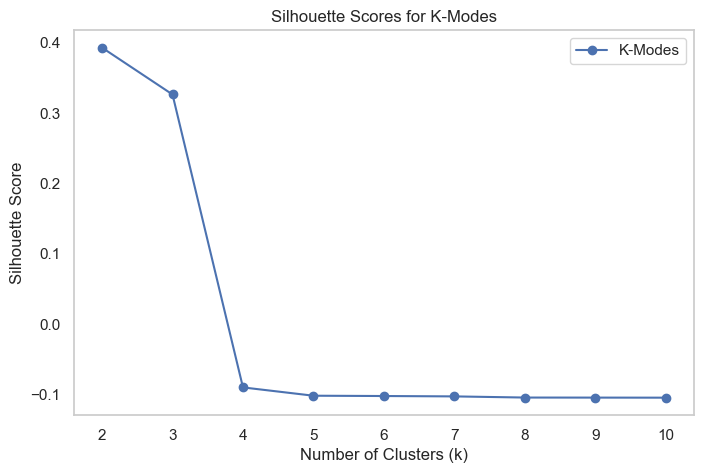

In [28]:
# Calculate silhouette scores for different values of k for K-Modes
silhouette_scores_modes = []
k_values = range(2, 11)

for k in k_values:
    kmodes = KModes(n_clusters=k, random_state=42)
    clusters_modes = kmodes.fit_predict(new_data)
    
    # Since silhouette score is not applicable for K-Modes directly, 
    # we can convert clusters back to numerical to calculate if needed
    try:
        score = silhouette_score(new_data, clusters_modes)
    except ValueError:
        score = None  # Not applicable
    
    silhouette_scores_modes.append(score)

# Plotting silhouette scores for K-Modes
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores_modes, marker='o', label='K-Modes')
plt.title('Silhouette Scores for K-Modes')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.legend()
plt.show()

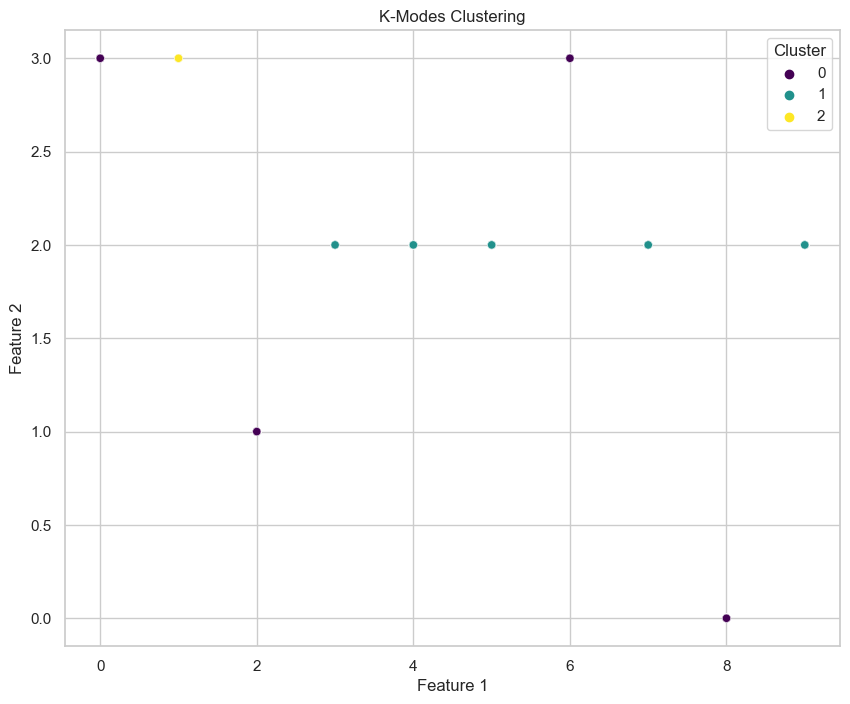

In [29]:
# Fit K-Modes with the optimal number of clusters
optimal_k_modes = 3  # Adjust based on the plot
kmodes = KModes(n_clusters=optimal_k_modes, random_state=42)
clusters_modes = kmodes.fit_predict(new_data)

# Add the cluster labels to the original data
data_modes = new_data.copy()
data_modes['Cluster'] = clusters_modes

# Visualizing the clusters for K-Modes
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data_modes['Species'], y=data_modes['Family'], hue=clusters_modes, palette='viridis', alpha=0.6)
plt.title('K-Modes Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

In [30]:
max(silhouette_scores_modes)

0.39302885190321596

### K Midranges

Number of clusters: 4, Silhouette Score: 0.7084
Number of clusters: 5, Silhouette Score: 0.7157
Number of clusters: 6, Silhouette Score: 0.7546
Number of clusters: 7, Silhouette Score: 0.7119
Number of clusters: 8, Silhouette Score: 0.7394


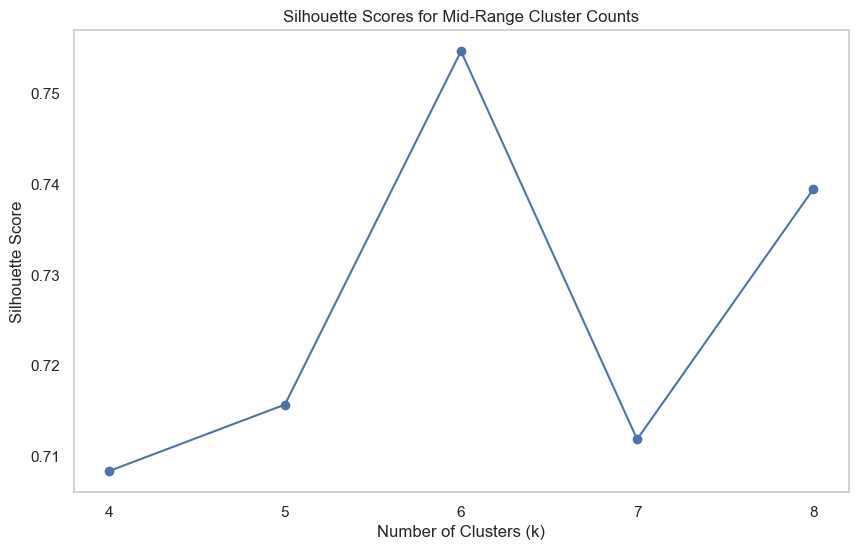

In [33]:
X = new_data
mid_range_k = range(4, 9)  # Adjust this range based on your data

silhouette_scores = []

# Run K-Means and calculate silhouette scores for mid-range k values
for k in mid_range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Number of clusters: {k}, Silhouette Score: {score:.4f}')

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(mid_range_k, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Mid-Range Cluster Counts')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(mid_range_k)
plt.grid()
plt.show()

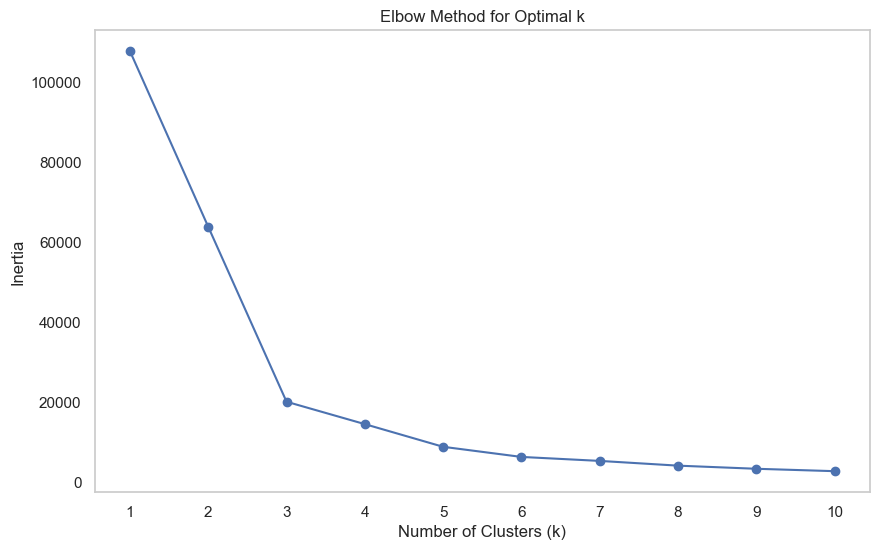

In [34]:
k_values = range(1, 11)  # You can adjust this range as needed

# Calculate inertia for each k
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances to closest cluster center

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

In [35]:
silhouette_scores

[0.7083875953073798,
 0.7157169305610768,
 0.7546368850848609,
 0.7118988351647904,
 0.7394436874026663]